We will be using MNIST Database

In [1]:
from keras.datasets import mnist

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [2]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

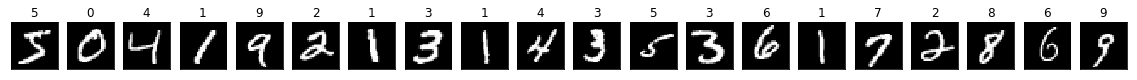

In [3]:
# Visualize some of the downloaded data
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

fig = plt.figure(figsize=(20,20))
for i in range(20):
    ax = fig.add_subplot(1,20,i+1,xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

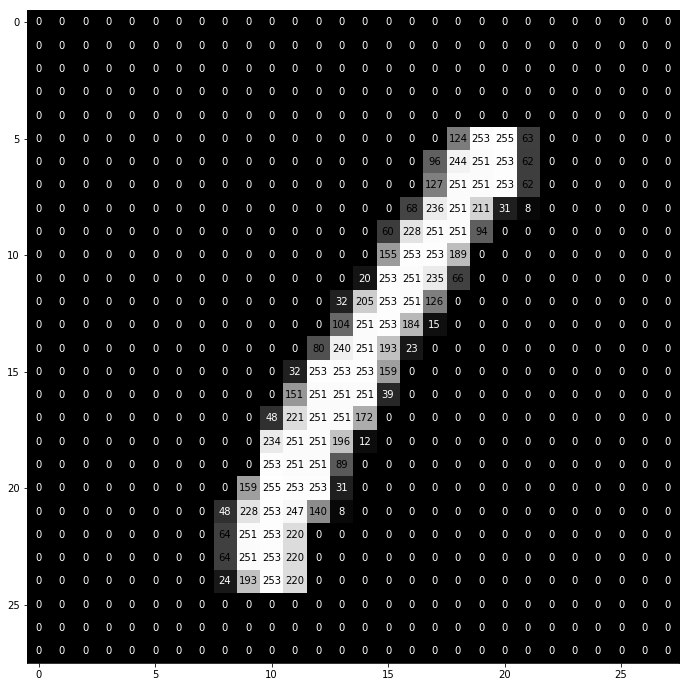

In [6]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/4.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[3], ax)

In [7]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

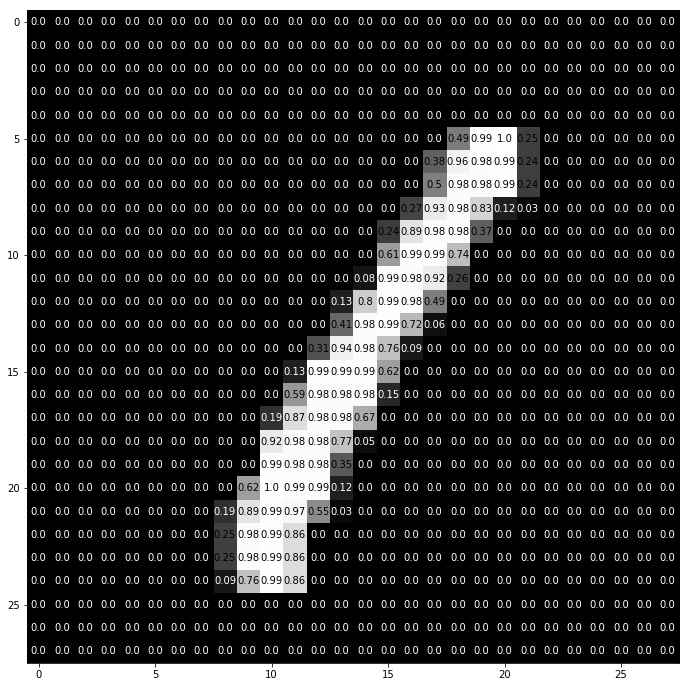

In [9]:
fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[3], ax)

In [10]:
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [11]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

In [14]:
# Accuracy obtained without training
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 8.8300%


In [17]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='models/mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.3, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 7s 178us/step - loss: 0.1008 - acc: 0.9695 - val_loss: 0.1022 - val_acc: 0.9707

Epoch 00001: val_loss improved from inf to 0.10216, saving model to mnist.model.best.hdf5
Epoch 2/10
42000/42000 [==============================] - 8s 179us/step - loss: 0.0740 - acc: 0.9767 - val_loss: 0.1145 - val_acc: 0.9676

Epoch 00002: val_loss did not improve from 0.10216
Epoch 3/10
42000/42000 [==============================] - 8s 198us/step - loss: 0.0579 - acc: 0.9820 - val_loss: 0.1014 - val_acc: 0.9737

Epoch 00003: val_loss improved from 0.10216 to 0.10145, saving model to mnist.model.best.hdf5
Epoch 4/10
42000/42000 [==============================] - 8s 200us/step - loss: 0.0475 - acc: 0.9849 - val_loss: 0.0989 - val_acc: 0.9756

Epoch 00004: val_loss improved from 0.10145 to 0.09887, saving model to mnist.model.best.hdf5
Epoch 5/10
42000/42000 [==============================] - 8s 183u

In [18]:
# load the weights that yielded the best validation accuracy
model.load_weights('models/mnist.model.best.hdf5')

In [19]:
# Lets run it on the test set!!
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.7500%


Pretty good accuracy!!

In [20]:
# Lets play around the parameters and see what happens

# define the model
model1 = Sequential()
model1.add(Flatten(input_shape=X_train.shape[1:]))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1024, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax'))

# summarize the model
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                10250     
Total params: 1,863,690
Trainable params: 1,863,690
Non-trainable params: 0
_________________________________________________________________


In [21]:
model1.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer1 = ModelCheckpoint(filepath='models/mnist.model.best.hdf5.model1', 
                               verbose=1, save_best_only=True)
hist1 = model1.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.3, callbacks=[checkpointer1],
          verbose=1, shuffle=True)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 21s 489us/step - loss: 0.2665 - acc: 0.9174 - val_loss: 0.1338 - val_acc: 0.9608

Epoch 00001: val_loss improved from inf to 0.13381, saving model to mnist.model.best.hdf5.model1
Epoch 2/10
42000/42000 [==============================] - 20s 486us/step - loss: 0.1036 - acc: 0.9691 - val_loss: 0.1117 - val_acc: 0.9671

Epoch 00002: val_loss improved from 0.13381 to 0.11166, saving model to mnist.model.best.hdf5.model1
Epoch 3/10
42000/42000 [==============================] - 21s 489us/step - loss: 0.0752 - acc: 0.9772 - val_loss: 0.1217 - val_acc: 0.9681

Epoch 00003: val_loss did not improve from 0.11166
Epoch 4/10
42000/42000 [==============================] - 21s 505us/step - loss: 0.0587 - acc: 0.9823 - val_loss: 0.1252 - val_acc: 0.9687

Epoch 00004: val_loss did not improve from 0.11166
Epoch 5/10
42000/42000 [==============================] - 22s 534us/step - loss: 0.0510 - 

In [22]:
model1.load_weights('models/mnist.model.best.hdf5.model1')
score = model1.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.2000%


Some good amount of overfitting, when we increased the nodes in each layer

In [25]:
# define the model
model2 = Sequential()
model2.add(Flatten(input_shape=X_train.shape[1:]))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

# summarize the model
model2.summary()

model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer2 = ModelCheckpoint(filepath='models/mnist.model.best.hdf5.model2', 
                               verbose=1, save_best_only=True)
hist2 = model2.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.3, callbacks=[checkpointer2],
          verbose=1, shuffle=True)

model2.load_weights('models/mnist.model.best.hdf5.model2')
score = model2.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_11 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_12 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
__________

In [26]:
# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.6300%


A good accuracy but lower than the first model - with lesser hidden layers. So a little overfitting seen.

**Approach 3** <br>
Lets try removing drop out layers

In [27]:
# define the model
model3 = Sequential()
model3.add(Flatten(input_shape=X_train.shape[1:]))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(10, activation='softmax'))

# summarize the model
model3.summary()

model3.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer3 = ModelCheckpoint(filepath='models/mnist.model.best.hdf5.model3', 
                               verbose=1, save_best_only=True)
hist3 = model3.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.3, callbacks=[checkpointer3],
          verbose=1, shuffle=True)

model3.load_weights('models/mnist.model.best.hdf5.model3')
score = model3.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_21 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 8s 188us/step - loss: 0.2598 - acc: 0.9199 - val_loss: 0.1361 - val_acc: 0.9598

Epoch 00001: val_loss improved from inf to 0.13608, saving model to mnist.model

*Pretty good accuracy! However, lesser than the original model, even when the training accuracy is better in this model than the previous one - overfitting!*

**Play with activation funcions**

In [28]:
# define the model
model4 = Sequential()
model4.add(Flatten(input_shape=X_train.shape[1:]))
model4.add(Dense(512, activation='sigmoid'))
model4.add(Dropout(0.2))
model4.add(Dense(512, activation='sigmoid'))
model4.add(Dropout(0.2))
model4.add(Dense(10, activation='softmax'))

# summarize the model
model4.summary()

model4.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer4 = ModelCheckpoint(filepath='models/mnist.model.best.hdf5.model4', 
                               verbose=1, save_best_only=True)
hist4 = model4.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.3, callbacks=[checkpointer4],
          verbose=1, shuffle=True)

model4.load_weights('models/mnist.model.best.hdf5.model4')
score = model4.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_7 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

In [29]:
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.4100%


*In this case, the MLP weights could not be adjusted too much within the epochs to reach the high accuracy levels - 
something that was easily being done when ReLu was used.*

In [31]:
# Lets play wth optimizers

# define the model
model5 = Sequential()
model5.add(Flatten(input_shape=X_train.shape[1:]))
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(512, activation='relu'))
model5.add(Dropout(0.2))
model5.add(Dense(10, activation='softmax'))

# summarize the model
model5.summary()

model5.compile(loss='categorical_crossentropy', optimizer='sgd', 
              metrics=['accuracy'])

checkpointer5 = ModelCheckpoint(filepath='models/mnist.model.best.hdf5.model5', 
                               verbose=1, save_best_only=True)
hist5 = model5.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.3, callbacks=[checkpointer5],
          verbose=1, shuffle=True)

model5.load_weights('models/mnist.model.best.hdf5.model5')
score = model5.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_16 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

In [39]:
from keras import optimizers

# define the model
model6 = Sequential()
model6.add(Flatten(input_shape=X_train.shape[1:]))
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(512, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(10, activation='softmax'))

# summarize the model
model6.summary()
sgd = optimizers.SGD(lr=0.03, momentum=0.0, decay=0.0, nesterov=True)
model6.compile(loss='categorical_crossentropy', optimizer=sgd, 
              metrics=['accuracy'])

checkpointer6 = ModelCheckpoint(filepath='models/mnist.model.best.hdf5.model6', 
                               verbose=1, save_best_only=True)
hist6 = model6.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.3, callbacks=[checkpointer6],
          verbose=1, shuffle=True)

model6.load_weights('models/mnist.model.best.hdf5.model6')
score = model6.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_36 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_53 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_37 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_54 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_38 (Dropout)         (None, 512)               0         
__________

**Play with batch size**

In [40]:
# define the model
model7 = Sequential()
model7.add(Flatten(input_shape=X_train.shape[1:]))
model7.add(Dense(512, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(512, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(10, activation='softmax'))

# summarize the model
model7.summary()

model7.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer7 = ModelCheckpoint(filepath='models/mnist.model.best.hdf5.model7', 
                               verbose=1, save_best_only=True)
hist7 = model7.fit(X_train, y_train, batch_size=512, epochs=10,
          validation_split=0.3, callbacks=[checkpointer7],
          verbose=1, shuffle=True)

model7.load_weights('models/mnist.model.best.hdf5.model7')
score = model7.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

*Highest accuracy ever for us!! No wonder, we had used an increased batch size*

**Lets see what happens if we miss the prepocessing step**

In [42]:
# Load the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [46]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model8
model8 = Sequential()
model8.add(Flatten(input_shape=X_train.shape[1:]))
model8.add(Dense(512, activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(512, activation='relu'))
model8.add(Dropout(0.2))
model8.add(Dense(10, activation='softmax'))

# summarize the model8
model8.summary()

model8.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

checkpointer8 = ModelCheckpoint(filepath='models/mnist.model8.best.hdf5.prep', 
                               verbose=1, save_best_only=True)
hist8 = model8.fit(X_train, y_train, batch_size=512, epochs=10,
          validation_split=0.3, callbacks=[checkpointer8],
          verbose=1, shuffle=True)

model8.load_weights('models/mnist.model8.best.hdf5.prep')

score = model8.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_19 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_65 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_45 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_66 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_46 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai